In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score 
from sklearn.metrics import classification_report
import seaborn as sns
from matplotlib.gridspec import GridSpec
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV

In [27]:
df = pd.read_csv("diabetes_data.csv")

In [28]:
df.head()

# Numerical vars: Age, BMI, MentHlth, PhysHlth. Rest are categorical

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
df.info()
# also no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

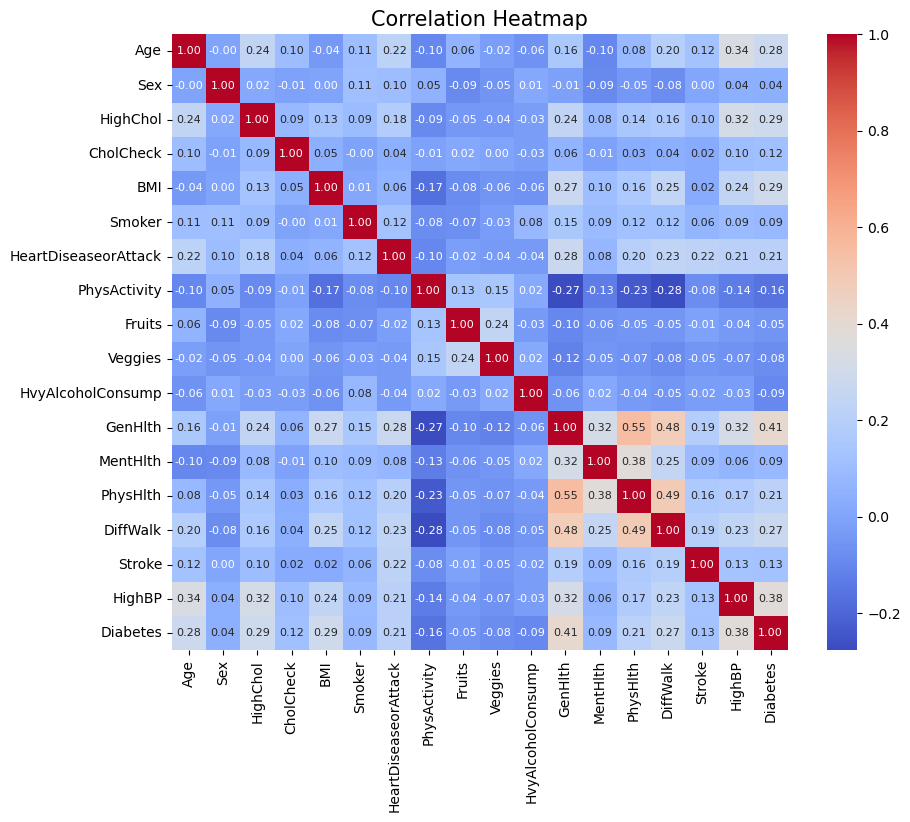

In [30]:
df_encoded = df.copy()
corr = df_encoded.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True, annot_kws={"size": 8})
plt.title("Correlation Heatmap", fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# the features that correlate with diabetes the most are: GenHlth, HighBP, HighChol, BMI, Age

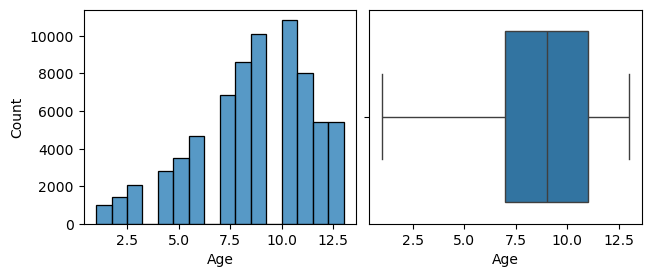

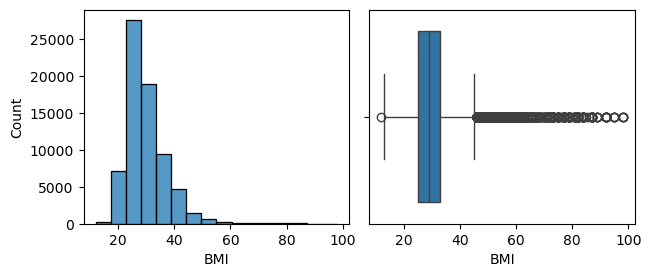

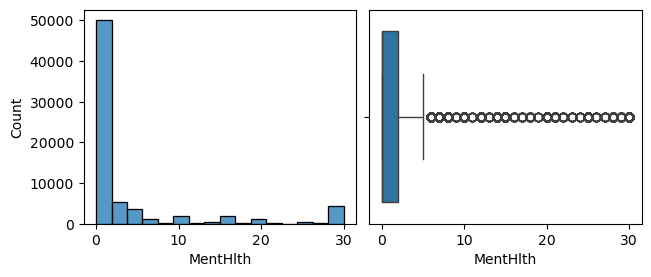

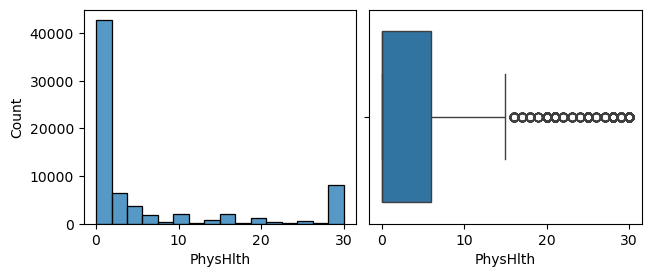

In [31]:
numerical_vars = ['Age', 'BMI', 'MentHlth', 'PhysHlth']
df_numeric = df[numerical_vars]

columns = df_numeric.columns
for idx in range(len(columns)):
    x_value = columns[idx]
    t_value = columns[idx].title()
    fig = plt.figure(constrained_layout=True)
    gs = GridSpec(2, 2, figure=fig)
    # create sub plots as grid
    ax2 = fig.add_subplot(gs[1, 0])
    sns.histplot(x=x_value,data=df_numeric,bins=16)
    ax3 = fig.add_subplot(gs[1, 1])
    sns.boxplot(data=df_numeric,x=x_value,orient='h')


In [32]:
X = df.iloc[:, :-1]
y = df['Diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

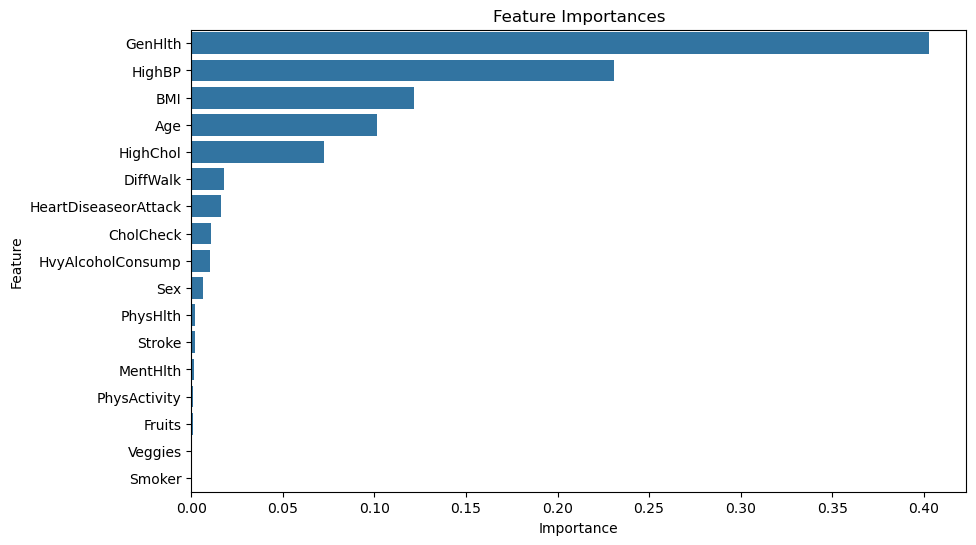

In [33]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)

importances = model.feature_importances_  
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})  
sorted_feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))  
sns.barplot(x='Importance', y='Feature', data=sorted_feature_importances)  
plt.title('Feature Importances')  
plt.show() 

In [34]:
encoder = LabelEncoder()
for column in df.columns:
    df[column] = encoder.fit_transform(df[column])

In [35]:
df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,3,1,0,1,14,0,0,1,0,1,0,2,5,30,0,0,1,0
1,11,1,1,1,14,1,0,0,1,0,0,2,0,0,0,1,1,0
2,12,1,0,1,14,0,0,1,1,1,0,0,0,10,0,0,0,0
3,10,1,1,1,16,1,0,1,1,1,0,2,0,3,0,0,1,0
4,7,0,0,1,17,1,0,1,1,1,0,1,0,0,0,0,0,0


In [36]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

nb = GaussianNB()

nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {acc:.3f}")
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(report)

Accuracy: 0.719
Confusion Matrix:
[[7742 2938]
 [3020 7508]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.72      0.72      0.72     10680
         1.0       0.72      0.71      0.72     10528

    accuracy                           0.72     21208
   macro avg       0.72      0.72      0.72     21208
weighted avg       0.72      0.72      0.72     21208



In [37]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=17)

grid_search = GridSearchCV(dt, param_grid={'max_depth':range(1,30,1)}, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

# GridSearch determined that the best max_depth is 8

Best parameters found:  {'max_depth': 8}
Best cross-validation score:  0.7433513552566373


In [38]:
# Decision Tree
dt = DecisionTreeClassifier(max_depth=8, random_state=17)
kf = KFold(n_splits=5, shuffle=True, random_state=17)
cv_scores = cross_val_score(dt, X, y, cv=kf, scoring='accuracy')
print("Cross-validation scores for each fold:", cv_scores)
print("Average cross-validation accuracy:", cv_scores.mean())

print()

dt.fit(X,y)
#training/testing are very similar, so not overfit
print("\nTraining, Testing Accuracy Score:")
print(dt.score(X_train, y_train),dt.score(X_test, y_test))
print("\nDecision Tree:")
print(export_text(dt, feature_names=X.columns.to_list()))
# uncomment the above to see the tree, but it's pretty long ^^

# the 8 features used: HighBP, GenHlth, Age, BMI, HighChol, HeartDiseaseorAttack, Fruits, PhysActivity

Cross-validation scores for each fold: [0.74064644 0.73569559 0.74678172 0.73758665 0.73949639]
Average cross-validation accuracy: 0.7400413588621774


Training, Testing Accuracy Score:
0.7522229407485248 0.7445775179177668

Decision Tree:
|--- HighBP <= 0.50
|   |--- GenHlth <= 2.50
|   |   |--- Age <= 9.50
|   |   |   |--- BMI <= 28.50
|   |   |   |   |--- HighChol <= 0.50
|   |   |   |   |   |--- GenHlth <= 1.50
|   |   |   |   |   |   |--- BMI <= 23.50
|   |   |   |   |   |   |   |--- HeartDiseaseorAttack <= 0.50
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |--- HeartDiseaseorAttack >  0.50
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- BMI >  23.50
|   |   |   |   |   |   |   |--- Age <= 6.50
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |--- Age >  6.50
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- GenHlth >  1.50
|   |   |   |   |   |   |--- Age <= 5.50
|   |   |

In [39]:
from time import time
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": randint(1,18), 
              "min_samples_split": randint(2, 18),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

rf = RandomForestClassifier(n_estimators=20)

n_iter_search = 20
random_search = RandomizedSearchCV(rf, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5)

start = time()
random_search.fit(X, y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))

RandomizedSearchCV took 475.85 seconds for 20 candidates parameter settings.


In [40]:
print("Best parameters found:", random_search.best_params_)
print("Best cross-validation score: {:.4f}".format(random_search.best_score_))

# best is to not limit the tree? it says "best max_depth: None" 

Best parameters found: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 6, 'min_samples_split': 12}
Best cross-validation score: 0.7382


In [41]:
# use the best model found from RandomizedSearchCV
best_rf = random_search.best_estimator_

# 5-fold cross-validation w/ shuffling
kf = KFold(n_splits=5, shuffle=True, random_state=17)
cv_scores = cross_val_score(best_rf, X, y, cv=kf, scoring='accuracy')

print("Cross-validation scores for each fold:", cv_scores)
print("Average cross-validation accuracy:", cv_scores.mean())

print()

best_rf.fit(X_train, y_train)
rf_pred = best_rf.predict(X_test)

rf_cm = metrics.confusion_matrix(y_test, rf_pred)
print("Confusion Matrix on Test Data:\n", rf_cm)

print("\nClassification Report:\n", metrics.classification_report(y_test, rf_pred))

#significant difference between train/test accuracy, so safe to say that the model is overfitting
print("\nTraining, Testing Accuracy Score:")
print(best_rf.score(X_train, y_train),best_rf.score(X_test, y_test))

# An example predictor tree (1 out of 50)
print("\nExample tree from the forest:")
from sklearn.tree import export_text

# print(export_text(best_rf.estimators_[0], feature_names=X.columns.to_list()))

Cross-validation scores for each fold: [0.73845392 0.73923191 0.74140614 0.74069883 0.73709153]
Average cross-validation accuracy: 0.739376465046916

Confusion Matrix on Test Data:
 [[7440 3240]
 [2382 8146]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.76      0.70      0.73     10680
         1.0       0.72      0.77      0.74     10528

    accuracy                           0.73     21208
   macro avg       0.74      0.74      0.73     21208
weighted avg       0.74      0.73      0.73     21208


Training, Testing Accuracy Score:
0.8531040336270309 0.73491135420596

Example tree from the forest:


In [42]:
# model is overfitting, with extreme depth being the notable issue
# using max_depth parameter from optimal decision tree + all other optimal parameters from random forest to attempt to reduce this overfitting
best_rf = RandomForestClassifier(n_estimators=50, max_depth=8, max_features=3,random_state=17)

# 5-fold cross-validation w/ shuffling
kf = KFold(n_splits=5, shuffle=True, random_state=17)
cv_scores = cross_val_score(best_rf, X, y, cv=kf, scoring='accuracy')

print("Cross-validation scores for each fold:", cv_scores)
print("Average cross-validation accuracy:", cv_scores.mean())

print()

best_rf.fit(X_train, y_train)
rf_pred = best_rf.predict(X_test)

rf_cm = metrics.confusion_matrix(y_test, rf_pred)
print("Confusion Matrix on Test Data:\n", rf_cm)

print("\nClassification Report:\n", metrics.classification_report(y_test, rf_pred))

#no longer a significant difference between train/test accuracy, so safe to say that the model is no longer overfitting
print("\nTraining, Testing Accuracy Score:")
print(best_rf.score(X_train, y_train),best_rf.score(X_test, y_test))

# An example predictor tree (1 out of 50)
print("\nExample tree from the forest:")
from sklearn.tree import export_text

#print(export_text(best_rf.estimators_[0], feature_names=X.columns.to_list()))

Cross-validation scores for each fold: [0.74849706 0.74213169 0.75038902 0.74805489 0.74770123]
Average cross-validation accuracy: 0.747354779618654

Confusion Matrix on Test Data:
 [[7565 3115]
 [2295 8233]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.77      0.71      0.74     10680
         1.0       0.73      0.78      0.75     10528

    accuracy                           0.74     21208
   macro avg       0.75      0.75      0.74     21208
weighted avg       0.75      0.74      0.74     21208


Training, Testing Accuracy Score:
0.7566284051410557 0.7449075820445115

Example tree from the forest:


In [43]:
print("\n-=-=-=-=-=- Naive Bayes -=-=-=-=-=-")

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

acc = accuracy_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

print("\nAccuracy scores:")
print(f"Accuracy: {acc:.4f}")
print(f"Recall score (testing): {test_recall:.4f}")
print(f"F1 Score (testing): {test_f1:.4f}")

print("\nClassification Report:")
print(report)


-=-=-=-=-=- Naive Bayes -=-=-=-=-=-
Confusion Matrix:
[[7742 2938]
 [3020 7508]]

Accuracy scores:
Accuracy: 0.7191
Recall score (testing): 0.7131
F1 Score (testing): 0.7159

Classification Report:
              precision    recall  f1-score   support

         0.0       0.72      0.72      0.72     10680
         1.0       0.72      0.71      0.72     10528

    accuracy                           0.72     21208
   macro avg       0.72      0.72      0.72     21208
weighted avg       0.72      0.72      0.72     21208



In [44]:
from sklearn.metrics import confusion_matrix, recall_score, classification_report, accuracy_score

dt = DecisionTreeClassifier(max_depth=8, random_state=17)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

print("\n-=-=-=-=-=- Decision Tree Performance -=-=-=-=-=-")

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, dt_pred))

print("\nAccuracy Scores:")
print(f"Training Accuracy: {dt.score(X_train, y_train):.4f}")
print(f"Testing Accuracy:  {dt.score(X_test, y_test):.4f}")
test_f1 = f1_score(y_test, y_pred)
print(f"Testing F1 Score: {test_f1:.4f}")

print("\nRecall Score (Testing):")
print(f"{recall_score(y_test, dt_pred):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, dt_pred))


-=-=-=-=-=- Decision Tree Performance -=-=-=-=-=-

Confusion Matrix:
[[7616 3064]
 [2496 8032]]

Accuracy Scores:
Training Accuracy: 0.7576
Testing Accuracy:  0.7378
Testing F1 Score: 0.7159

Recall Score (Testing):
0.7629

Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.71      0.73     10680
         1.0       0.72      0.76      0.74     10528

    accuracy                           0.74     21208
   macro avg       0.74      0.74      0.74     21208
weighted avg       0.74      0.74      0.74     21208



In [45]:
print("\n-=-=-=-=-=- Random Forest -=-=-=-=-=-")

print("\nConfusion Matrix:")
print(rf_cm)

train_acc = best_rf.score(X_train, y_train)
test_acc = best_rf.score(X_test, y_test)
print("\nAccuracy scores:")
print("Training Accuracy: {:.4f}".format(train_acc))
print("Testing Accuracy:  {:.4f}".format(test_acc))

recall = recall_score(y_test, rf_pred)
print("Recall Score (Testing): {:.4f}".format(recall))

test_f1 = f1_score(y_test, y_pred)
print(f"Testing F1 Score: {test_f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, rf_pred))

# print("\nExample Tree (Tree 0):")
# print(export_text(best_rf.estimators_[0], feature_names=X.columns.to_list()))

# uncomment the above to see it, again, its long ^


-=-=-=-=-=- Random Forest -=-=-=-=-=-

Confusion Matrix:
[[7565 3115]
 [2295 8233]]

Accuracy scores:
Training Accuracy: 0.7566
Testing Accuracy:  0.7449
Recall Score (Testing): 0.7820
Testing F1 Score: 0.7159

Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.71      0.74     10680
         1.0       0.73      0.78      0.75     10528

    accuracy                           0.74     21208
   macro avg       0.75      0.75      0.74     21208
weighted avg       0.75      0.74      0.74     21208

